<h1>Support Vector Machine</h1>

<h3><strong>Aprendizado de máquinas</strong></h3>
<p><strong>Objetivo:</strong> Utilizar o algoritimo de SVM para classificar entre espécies de plantas de iris, utilizando kernels diferentes </p>

<p>Data: 27.08.2021 <br>Versão: 1.0</p>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [13]:
#Importar dataset Iris
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [17]:
#Ajustar o modelo
svc = svm.SVC(kernel='linear', C=1, gamma='auto',random_state=None)
svc.fit(x,y)

SVC(C=1, gamma='auto', kernel='linear')

In [28]:
# Criar o ambiente para os gráficos

x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

#criando o intervalo:
h = (x_max / x_min) / 100

#criando o hiperplano:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

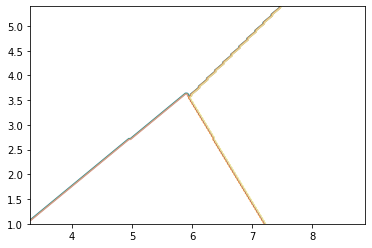

In [31]:
plt.subplot(1,1,1)
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx,yy, z, cmap=plt.cm.Paired, alpha=0.8)

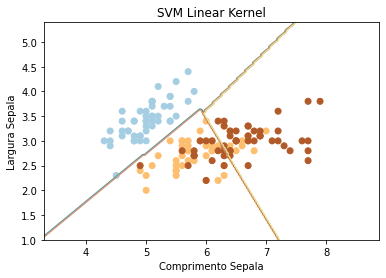

In [33]:
plt.subplot(1,1,1)
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx,yy, z, cmap=plt.cm.Paired, alpha=0.8)
#Adciona a amostra no gráfico
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Comprimento Sepala")
plt.ylabel("Largura Sepala")
plt.xlim(xx.min(), xx.max())
plt.title("SVM Linear Kernel")
plt.show()

<h1>Avaliando o modelo</h1>


In [35]:
#Importando Libs Complementares
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
#Explorando os dados
print("Features: ", iris.feature_names)
print("Target: ", iris.target_names)


Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target:  ['setosa' 'versicolor' 'virginica']


In [38]:
#Tamanho do dataset
iris.data.shape

(150, 4)

In [39]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [40]:
#Seprar o dataset em conjunto para treinamento e outro para teste
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [41]:
#Configuar o algoritmo:
clf = svm.SVC(kernel='linear', random_state=None, probability=True)

# Ajustar o modelo:
clf.fit(x_train, y_train)

# Fazer predições no conjunto de teste:
y_pred = clf.predict(x_test)


In [44]:
#Avaliando as metricas do modelo:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average=None))
print("Recall: ", metrics.recall_score(y_test, y_pred, average=None))


Accuracy:  0.9777777777777777
Precision:  [1.         1.         0.91666667]
Recall:  [1.         0.94444444 1.        ]


In [46]:
# Fazendo Predições

amostra = [4.7, 3.2, 1.3, 0.2]

print("Resultado: ", iris.target_names[clf.predict([amostra])])
print("Probabilidade: ", clf.predict_proba([amostra]))

Resultado:  ['setosa']
Probabilidade:  [[0.96497954 0.02287436 0.0121461 ]]
